In [62]:
# libraries

import sys
print("Python version: {}".format(sys.version))

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
print("Pandas version: {}".format(pd.__version__))
import numpy as np
print("Numpy version: {}".format(np.__version__))
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import rcParams
%matplotlib inline
print("Matplotlib version: {}".format(matplotlib.__version__))
import seaborn as sns
print("Seaborn version: {}".format(sns.__version__))
import scipy
print("Scipy version: {}".format(scipy.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

# Modelling libraries
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.cross_validation import train_test_split , StratifiedKFold

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier

print('-'*25)
# check inside input directory for the files
!dir input

Python version: 3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
Pandas version: 0.23.4
Numpy version: 1.14.5
Matplotlib version: 2.2.3
Seaborn version: 0.9.0
Scipy version: 1.1.0
scikit-learn version: 0.19.2
-------------------------
 Volume in drive D is Work
 Volume Serial Number is 20F0-666E

 Directory of D:\My_Work\Kaggle\Titanic\input

08/16/2018  11:46 PM    <DIR>          .
08/16/2018  11:46 PM    <DIR>          ..
08/16/2018  11:45 PM             3,258 gender_submission.csv
08/16/2018  11:46 PM            28,629 test.csv
08/16/2018  11:46 PM            61,194 train.csv
               3 File(s)         93,081 bytes
               2 Dir(s)  155,028,774,912 bytes free


In [63]:
# loading data

train_df = pd.read_csv("input/train.csv")
test_df = pd.read_csv("input/test.csv")

print("Train dataframe shape is: ", train_df.shape)
print("Test dataframe shape is: ", test_df.shape)

Train dataframe shape is:  (891, 12)
Test dataframe shape is:  (418, 11)


In [64]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [65]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [66]:
print(train_df.info())
print('-'*30)
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null obje

In [67]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [68]:
print("total 'train_df' columns with null values:\n", train_df.isnull().sum())
print('-'*30)
print("total 'test_df' columns with null values:\n", test_df.isnull().sum())

total 'train_df' columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
------------------------------
total 'test_df' columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [69]:
train_df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [70]:
train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [71]:
train_df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [72]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [73]:
full_df = train_df.append(test_df, ignore_index=True)
print('full_df shape:', full_df.shape)
print('train_df shape:', train_df.shape)
print('test_df shape:', test_df.shape)

full_df shape: (1309, 12)
train_df shape: (891, 12)
test_df shape: (418, 11)


In [74]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [75]:
full_df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


### categorical values

In [76]:
embarked_df = pd.get_dummies(full_df.Embarked, prefix='Embarked')
embarked_df.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [77]:
full_df['Sex'] = full_df['Sex'].map({'female': 0, 'male': 1})
full_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450


In [78]:
pclass_df = pd.get_dummies(full_df.Pclass, prefix='Pclass')
pclass_df.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


### missing values

In [79]:
# missing values in Age, Cabin, Embarked, Fare
imputer_df = pd.DataFrame()

imputer_df['Age'] = full_df.Age.fillna(value= full_df.Age.mean())
imputer_df['Fare'] = full_df.Fare.fillna(value= full_df.Fare.mean())

imputer_df.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


### feature engineering

In [80]:
#list(full_df.Cabin.value_counts().index)

In [81]:
cabin_df = pd.DataFrame()

# missing values as U (unknown)
cabin_df['cabin'] = full_df.Cabin.fillna('U')

# mapping each Cabin value with the cabin letter
cabin_df[ 'cabin' ] = cabin_df[ 'cabin' ].map( lambda c : c[0] )

# dummy encoding
cabin_df = pd.get_dummies(cabin_df['cabin'], prefix='cabin')

cabin_df.head()

,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [82]:
# extracting class info from tickets, for ticket numbers where there's no class mentioned putting xxx
def cleanTicket(ticket):
    ticket = ticket.replace( '.', '')
    ticket = ticket.replace( '/', '')
    ticket = ticket.split()
    ticket = map(lambda t: t.strip(), ticket)
    ticket = list(filter(lambda t: not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else:
        return 'XXX'

ticket_df = pd.DataFrame()

ticket_df['Ticket'] = full_df.Ticket.map(cleanTicket)

# dummy encoding from ticket-classes
ticket_df = pd.get_dummies(ticket_df['Ticket'], prefix='Ticket')
print(ticket_df.shape)
ticket_df.head()


(1309, 37)


,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [83]:
# extracting family size from the Parch and SibSp variabels
family_df = pd.DataFrame()

# extracting family size, including the passenger
family_df['FamilySize'] = full_df['Parch'] + full_df['SibSp'] + 1

# extracting family type based on the size, as: single, small family or big family
family_df['SingleFamily'] = family_df['FamilySize'].map(lambda f: 1 if f == 1 else 0)
family_df['SmallFamily'] = family_df['FamilySize'].map(lambda f: 1 if 2 <= f <= 4 else 0)
family_df['BigFamily'] = family_df['FamilySize'].map(lambda f: 1 if f >= 5 else 0)

family_df.head()

,FamilySize,SingleFamily,SmallFamily,BigFamily
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


In [84]:
# new feature - extracting Title from Names
title_df = pd.DataFrame()

title_df['Title'] = full_df.Name.str.extract( ' ([A-Za-z]+)\.', expand=False)
# matches the first word which ends with a dot character 
# expand=False returns a dataframe

pd.crosstab(title_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [85]:
title_df['Title'] = title_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 
                                               'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
title_df['Title'] = title_df['Title'].replace('Mlle', 'Miss')
title_df['Title'] = title_df['Title'].replace('Ms', 'Miss')
title_df['Title'] = title_df['Title'].replace('Mme', 'Mrs')

pd.crosstab(title_df['Title'], train_df['Survived'])

Survived,0,1
Title,,
Master,17,23
Miss,55,130
Mr,436,81
Mrs,26,100
Rare,15,8


In [86]:
# dummy encoding
title_df = pd.get_dummies(title_df['Title'], prefix='Title')
title_df.head()

,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,1,0,0


In [87]:
full_df.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

In [88]:
# merging all dfs
# imputed , embarked , pclass , sex , family , cabin , ticket
full = pd.concat([imputer_df, embarked_df, pclass_df, full_df['Sex'], family_df, cabin_df, ticket_df, title_df], axis=1)

full.head()

,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex,FamilySize,...,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,22.0,7.2500,0,0,1,0,0,1,1,2,...,0,0,0,0,0,0,0,1,0,0
1,38.0,71.2833,1,0,0,1,0,0,0,2,...,0,0,0,0,0,0,0,0,1,0
2,26.0,7.9250,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,35.0,53.1000,0,0,1,1,0,0,0,2,...,0,0,0,0,1,0,0,0,1,0
4,35.0,8.0500,0,0,1,0,0,1,1,1,...,0,0,0,0,1,0,0,1,0,0


### creating datasets

In [89]:
X = full[0:891]
y = train_df['Survived']
X_test = full[891:]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=29)

print("\nfull: ", full.shape,"\nX_train: ", X_train.shape, "\ny_train: ", y_train.shape,
      "\nX_valid: ", X_valid.shape, "\ny_valid: ", y_valid.shape, "\nX_test: ", X_test.shape)


full:  (1309, 64) 
X_train:  (623, 64) 
y_train:  (623,) 
X_valid:  (268, 64) 
y_valid:  (268,) 
X_test:  (418, 64)


### feature importance

In [90]:
# selecting the optimal features is important in model building
tree = DecisionTreeClassifier(random_state=29)
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=29,
            splitter='best')

In [91]:
imp = pd.DataFrame(tree.feature_importances_ , 
                   columns=['Importance'], 
                   index=X.columns)

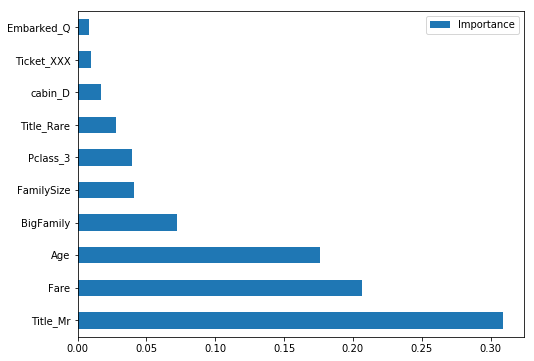

In [92]:
imp = imp.sort_values(['Importance'], ascending=False)
imp[ : 10 ].plot(kind = 'barh', figsize=(8, 6))

### model selection and training

In [93]:
# Logistic Regression

logr = LogisticRegression()
logr.fit(X_train, y_train)
#y_pred = logr.predict(X_test)
logr_acc = logr.score(X_train, y_train) * 100
logr_acc

83.94863563402889

In [94]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
#y_pred = svc.predict(X_test)
svc_acc = svc.score(X_train, y_train) * 100
svc_acc

81.05939004815409

In [95]:
# k-Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_acc = knn.score(X_train, y_train) * 100
knn_acc

83.94863563402889

In [96]:
# Gaussian Naive Bayes

gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_acc = gnb.score(X_train, y_train) * 100
gnb_acc

46.22792937399679

In [97]:
# Perceptron

perc = Perceptron()
perc.fit(X_train, y_train)
perc_acc = perc.score(X_train, y_train) * 100
perc_acc

76.24398073836277

In [98]:
# Linear SVC

lin_svc = LinearSVC()
lin_svc.fit(X_train, y_train)
lin_svc_acc = lin_svc.score(X_train, y_train) * 100
lin_svc_acc

83.62760834670947

In [99]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd_acc = sgd.score(X_train, y_train) * 100
sgd_acc

43.33868378812199

In [100]:
# Decision Tree

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_acc = dt.score(X_train, y_train) * 100
dt_acc

99.51845906902086

In [101]:
# Random Forest

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_acc = rf.score(X_train, y_train) * 100
rf_acc

99.51845906902086

In [102]:
# XGBoost 

xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)
xgb_acc = xgb.score(X_train, y_train) * 100
xgb_acc

90.36918138041734

In [103]:
# lets try all ML Algo and compare against each other

MLA = [
    #Ensemble
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    
    LogisticRegression(),
    SGDClassifier(),
    Perceptron(),
    
    #Naive Bayes
    GaussianNB(),
    BernoulliNB(),
    
    #Nearest Neighbor
    KNeighborsClassifier(),
    
    #SVM
    SVC(),
    LinearSVC(),
    
    #Trees
    DecisionTreeClassifier(),
    
    #xgboost
    XGBClassifier()
]

MLA_columns = ['MLA Name', 'Hyperparameters', 'Train Mean Accuracy', 'Test Mean Accuracy',
              'Test Accuracy 3*STD', 'Time Taken']
MLA_compare = pd.DataFrame(columns = MLA_columns)

MLA_predict = y

In [104]:
cv_split = ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 29 )

row_index = 0
for alg in MLA:
    
    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'Hyperparameters'] = str(alg.get_params())
    
    #score model with cross validation
    cv_results = cross_validate(alg, X_train, y_train, cv  = cv_split)
    
    MLA_compare.loc[row_index, 'Time Taken'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'Train Mean Accuracy'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'Test Mean Accuracy'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, 
    #should statistically capture 99.7% of the subsets. let's see the worst that can happen!
    MLA_compare.loc[row_index, 'Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   
    
    #save MLA predictions - see section 6 for usage
    alg.fit(X_train, y_train)
    MLA_predict[MLA_name] = alg.predict(X_train)
    
    row_index+=1
    
MLA_compare.sort_values(by = ['Test Mean Accuracy'], ascending = False, inplace = True)
MLA_compare

,MLA Name,Hyperparameters,Train Mean Accuracy,Test Mean Accuracy,Test Accuracy 3*STD,Time Taken
3,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",0.85067,0.828342,0.0686099,0.00624478
1,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.940751,0.827807,0.0595099,0.112503
12,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.910456,0.825134,0.0782815,0.0859353
2,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.978016,0.812299,0.061488,0.017189
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.880429,0.804813,0.0899684,0.0906284
10,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.826273,0.796791,0.130135,0.0265633
7,BernoulliNB,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':...",0.803753,0.796791,0.0924376,0.0078207
11,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.996247,0.765241,0.0566971,0.00468738
9,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.815818,0.70107,0.0733245,0.0156254
8,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.796783,0.681818,0.0609837,0.00156472


Text(0,0.5,'Algorithm')

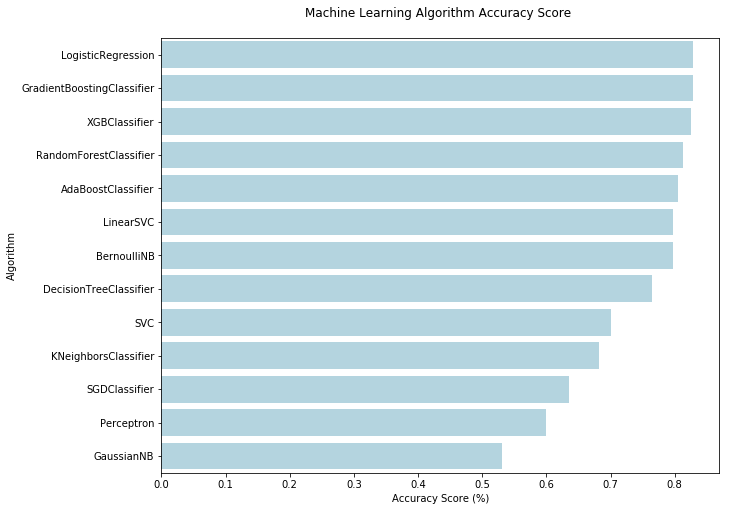

In [108]:
sns.barplot(x='Test Mean Accuracy', y = 'MLA Name', data = MLA_compare, color = 'lightblue')

rcParams['figure.figsize'] = (8,6)
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')


#### modelling using important features

In [118]:
imp[:10] #top 10 imp features
imp[:10].index

Index(['Title_Mr', 'Fare', 'Age', 'BigFamily', 'FamilySize', 'Pclass_3',
       'Title_Rare', 'cabin_D', 'Ticket_XXX', 'Embarked_Q'],
      dtype='object')

In [127]:
full.loc[:4,['Title_Mr', 'Fare', 'Age', 'BigFamily', 'FamilySize', 'Pclass_3',
       'Title_Rare', 'cabin_D', 'Ticket_XXX', 'Embarked_Q']]

,Title_Mr,Fare,Age,BigFamily,FamilySize,Pclass_3,Title_Rare,cabin_D,Ticket_XXX,Embarked_Q
0,1,7.2500,22.0,0,2,1,0,0,0,0
1,0,71.2833,38.0,0,2,0,0,0,0,0
2,0,7.9250,26.0,0,1,1,0,0,0,0
3,0,53.1000,35.0,0,2,0,0,0,1,0
4,1,8.0500,35.0,0,1,1,0,0,1,0


In [129]:
# create new dataset
X1 = full.loc[0:890,['Title_Mr', 'Fare', 'Age', 'BigFamily', 'FamilySize', 'Pclass_3',
       'Title_Rare', 'cabin_D', 'Ticket_XXX', 'Embarked_Q']]
y1 = train_df['Survived']
X_test = full.loc[891: ,['Title_Mr', 'Fare', 'Age', 'BigFamily', 'FamilySize', 'Pclass_3',
       'Title_Rare', 'cabin_D', 'Ticket_XXX', 'Embarked_Q']]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=29)

print("\nfull: ", full.shape,"\nX_train: ", X_train.shape, "\ny_train: ", y_train.shape,
      "\nX_valid: ", X_valid.shape, "\ny_valid: ", y_valid.shape, "\nX_test: ", X_test.shape)

ValueError: Found input variables with inconsistent numbers of samples: [891, 904]